# Lab 0: Azure ML settings

<img src='https://github.com/retkowsky/images/blob/master/AzureMLservicebanniere.png?raw=true'>

### This notebook allows you to connect to your workspace and to create your first Azure ML experiment.

## Documentation : 

- Azure ML Documentation: https://docs.microsoft.com/en-us/azure/machine-learning/
- GitHub: https://github.com/Azure/MachineLearningNotebooks/
- Main page: https://azure.microsoft.com/en-us/services/machine-learning-service/
- Pricing: https://azure.microsoft.com/en-us/pricing/details/machine-learning-service/
- Concepts: https://docs.microsoft.com/en-us/azure/machine-learning/service/concept-azure-machine-learning-architecture
- Forum: https://social.msdn.microsoft.com/Forums/en-US/home?forum=AzureMachineLearningService 
- Addin Visual Studio: https://marketplace.visualstudio.com/items?itemName=ms-toolsai.vscode-ai#overview
- Power BI integrationhttps://docs.microsoft.com/en-us/power-bi/service-machine-learning-automated 

Azure ML overview: https://docs.microsoft.com/en-us/python/api/overview/azure/ml/?preserve-view=true&view=azure-ml-py

## Session Information

In [1]:
import sys
print("You are using Python", sys.version)

You are using Python 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]


In [2]:
from platform import python_version
print(python_version())

3.6.9


In [3]:
import datetime
now = datetime.datetime.now()
print('Date:', now)

Date: 2021-02-01 14:13:12.300004


In [4]:
from azureml.core import Workspace, Environment

In [5]:
import azureml.core
print("This Jupyter notebook was made using Azure ML 1.21.0")
print("You are using Azure ML", azureml.core.VERSION)

This Jupyter notebook was made using Azure ML 1.21.0
You are using Azure ML 1.21.0


> Azure ML Release Notes: https://docs.microsoft.com/en-us/azure/machine-learning/azure-machine-learning-release-notes

In [6]:
# If you are not running Azure ML 1.20.0 please run this command and restart your Jupyter kernel
#!pip install --upgrade azureml-sdk

In [7]:
#Let's check you are using Azure ML 1.20.0
import azureml.core
print("You are using Azure ML",azureml.core.VERSION)

You are using Azure ML 1.21.0


In [8]:
import scipy, numpy, matplotlib, pandas, sklearn
print("Versions:")
print('- scipy = {}'.format(scipy.__version__))
print('- numpy = {}'.format(numpy.__version__))
print('- matplotlib = {}'.format(matplotlib.__version__))
print('- pandas = {}'.format(pandas.__version__))
print('- sklearn = {}'.format(sklearn.__version__))

Versions:
- scipy = 1.5.2
- numpy = 1.19.5
- matplotlib = 3.3.4
- pandas = 1.1.5
- sklearn = 0.22.2.post1


## Information about your Azure ML compute instance that hosts your notebook

In [9]:
import platform,socket,re,uuid,json,psutil,logging

def getSystemInfo():
    try:
        info={}
        info['Platforme']=platform.system()
        info['Platforme-release']=platform.release()
        info['Platforme-version']=platform.version()
        info['Architecture']=platform.machine()
        info['Hostname']=socket.gethostname()
        info['IP-address']=socket.gethostbyname(socket.gethostname())
        info['MAC-address']=':'.join(re.findall('..', '%012x' % uuid.getnode()))
        info['Processeur']=platform.processor()
        info['RAM']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" Go"
        return json.dumps(info)
    except Exception as e:
        logging.exception(e)

json.loads(getSystemInfo())

{'Platforme': 'Linux',
 'Platforme-release': '4.15.0-1100-azure',
 'Platforme-version': '#111~16.04.1-Ubuntu SMP Thu Nov 19 06:49:21 UTC 2020',
 'Architecture': 'x86_64',
 'Hostname': 'instancenbooks',
 'IP-address': '127.0.0.1',
 'MAC-address': '00:0d:3a:2a:66:0f',
 'Processeur': 'x86_64',
 'RAM': '14 Go'}

## Azure ML Workspace access

In [10]:
import os
subscription_id = os.environ.get("SUBSCRIPTION_ID", "TOBEREPLACED") # ID Azure
resource_group = os.environ.get("RESOURCE_GROUP", "AMLworkshop-rg") #Azure ML Resource group
workspace_name = os.environ.get("WORKSPACE_NAME", "AMLworkshop") # Azure ML Workspace name

In [ ]:
from azureml.core import Workspace

try:
   ws = Workspace(subscription_id = subscription_id, resource_group = resource_group, workspace_name = workspace_name)
   ws.write_config()
   print("AzureML workspace (", ws.name , ") was found. OK.")
except:
   print("Error: No Azure ML workspace was found.")

## Workspace information

In [11]:
ws = Workspace.from_config()
print('Workspace : ' + ws.name, 
      'Region : ' + ws.location, 
      'Ressource Group : ' + ws.resource_group, sep='\n')

Workspace : AMLworkshop
Region : westeurope
Ressource Group : AMLworkshop-rg


## Test: let's create a quick experiment, generate some analysis and save some output into an experiment

In [12]:
from azureml.core import Dataset

In [13]:
url ='https://raw.githubusercontent.com/retkowsky/AMLlabs/main/iris.csv'
dfiris = Dataset.Tabular.from_delimited_files(path=url)

In [14]:
tags1 = {"source" : "https://raw.githubusercontent.com/retkowsky/AMLlabs/main/iris.csv", 
         "test" : "Yes"}

In [15]:
# Let's register the dataset
df = dfiris.register(workspace = ws, 
                       name = 'Iris', 
                       description = 'IRIS Dataset',
                       tags=tags1,
                       create_new_version = True)

In [16]:
# Convert the dataset into a Pandas dataframe
df=df.to_pandas_dataframe()

In [17]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [19]:
df.shape

(150, 5)

In [20]:
df.query('sepal_length > 7.5')

sepal_length  sepal_width  petal_length  petal_width    species
105           7.6          3.0           6.6          2.1  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica
131           7.9          3.8           6.4          2.0  virginica
135           7.7          3.0           6.1          2.3  virginica

### Using Pandas Profiling

In [21]:
try:
    import pandas_profiling
    print("You are using Pandas Profiling:", pandas_profiling.__version__)
except ImportError:
    %pip install pandas_profiling

You are using Pandas Profiling: 2.10.0


In [22]:
import numpy as np
df.profile_report()

### Using HiPlot

In [23]:
try:
    import hiplot
    print("You are using HiPlot:", hiplot.__version__)
except ImportError:
    !pip install hiplot

You are using HiPlot: 0.1.22


In [24]:
hiplot.Experiment.from_dataframe(df).display()

<IPython.core.display.Javascript object>

### Statistics with Pingouin

In [25]:
try:
    import pingouin as pg
    print("You are using Pingouin:", pg.__version__)
except ImportError:
    !pip install pingouin

You are using Pingouin: 0.3.9


In [26]:
# Testing corr
pg.corr(df['sepal_length'], df['petal_length'])

n         r         CI95%        r2    adj_r2         p-val  \
pearson  150  0.871754  [0.83, 0.91]  0.759955  0.756689  1.038454e-47   

              BF10  power  
pearson  1.811e+44    1.0

In [27]:
# Let's do a linear regression
X = df[['sepal_length', 'sepal_width', 'petal_width']]  # features
y = df['petal_length']  # target
pg.linear_regression(X, y)

names      coef        se          T          pval       r2  \
0     Intercept -0.252664  0.296523  -0.852090  3.955595e-01  0.96815   
1  sepal_length  0.730363  0.058151  12.559666  5.409930e-25  0.96815   
2   sepal_width -0.651394  0.068383  -9.525679  4.997801e-17  0.96815   
3   petal_width  1.445720  0.067131  21.535943  3.603875e-47  0.96815   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.967496 -0.838697   0.333368  
1  0.967496  0.615436   0.845290  
2  0.967496 -0.786543  -0.516246  
3  0.967496  1.313046   1.578393

### Plotting using Seaborn

In [28]:
try:
    import seaborn as sb
    print('Seaborn version =', sb.__version__)
except ImportError:
    %pip install seaborn #If seaborn is not installed this command will install it. Restart the kernel

Seaborn version = 0.11.1


In [29]:
sb.set(style='whitegrid', context='notebook', rc={'figure.figsize':(10, 8)})

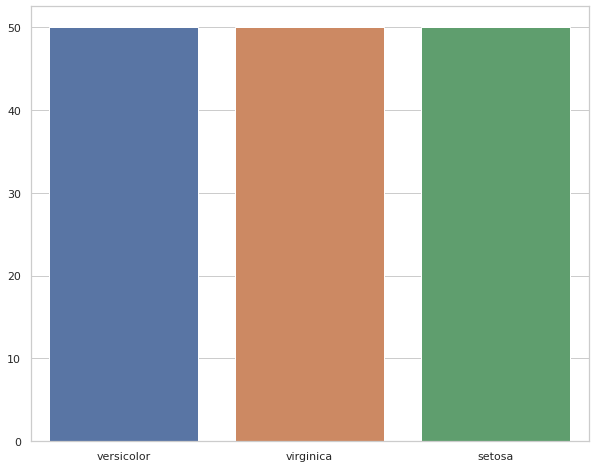

In [30]:
import matplotlib.pyplot as plt 

df2= df['species'].value_counts()
species = df2.index
count = df2.values

sb.barplot(x = species, y=count)
plt.show()

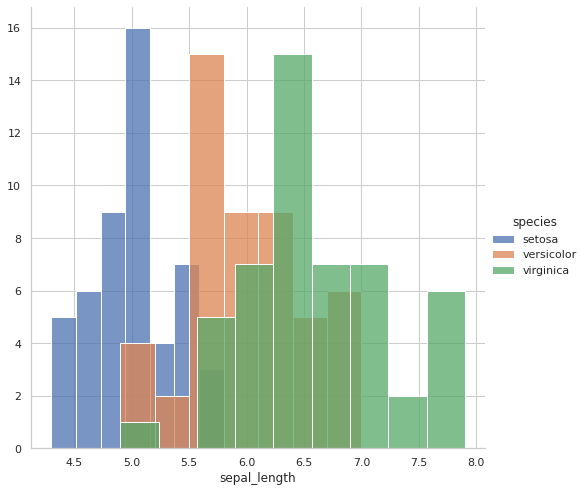

In [31]:
sb.FacetGrid(df, hue="species", height= 7) \
   .map(sb.histplot, "sepal_length") \
   .add_legend()
plt.show()

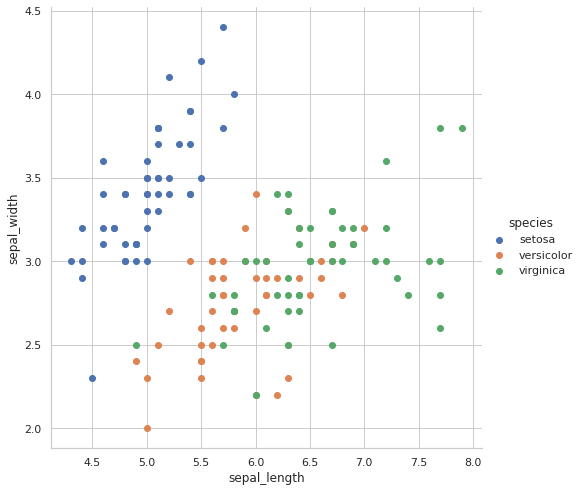

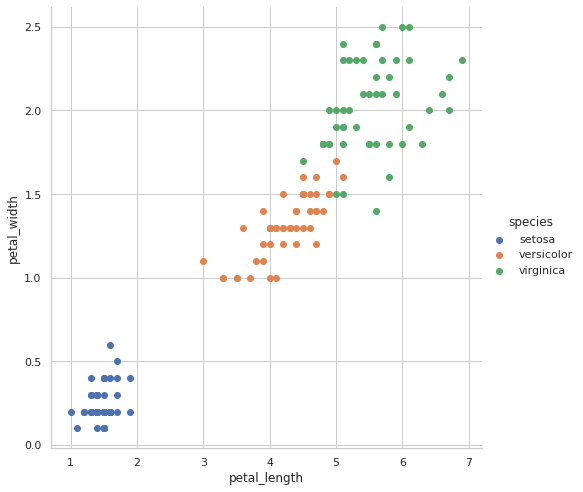

In [32]:
sb.FacetGrid(df, hue= 'species', height= 7)\
   .map(plt.scatter, 'sepal_length', 'sepal_width')\
   .add_legend();

sb.FacetGrid(df, hue= 'species', height= 7)\
   .map(plt.scatter, 'petal_length', 'petal_width')\
   .add_legend();
plt.show()

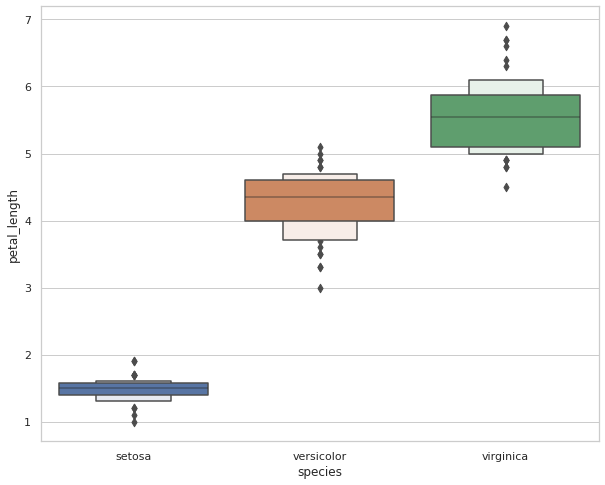

In [33]:
fig=plt.gcf()
fig=sb.boxenplot(x='species',y='petal_length',data=df)

In [34]:
corrmat=df.corr()

In [35]:
print(corrmat)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


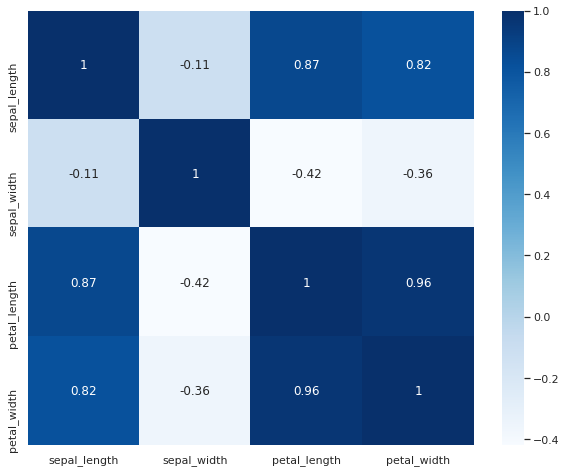

In [36]:
sb.heatmap(corrmat, annot=True, cmap="Blues")
plt.show()

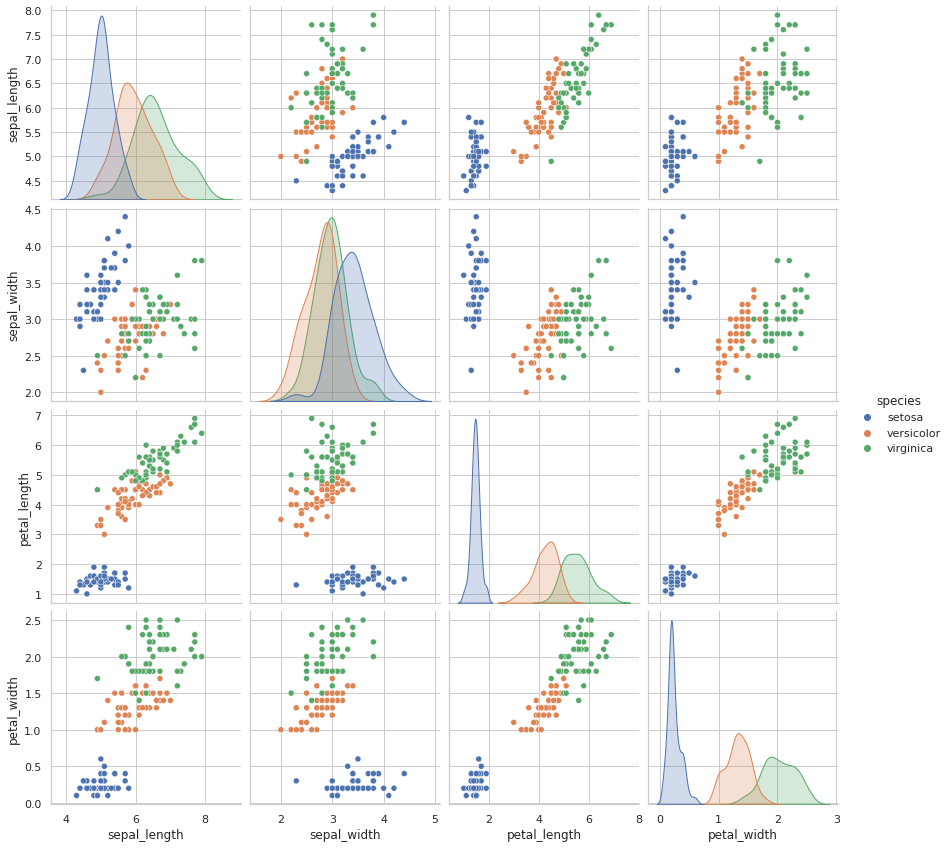

In [37]:
sb.set_style("whitegrid")
sb.pairplot(df,hue="species",height=3)
plt.show()

### Interative graphs using PlotLy

> PlotLy documentation: https://plotly.com/python/

In [38]:
try:
    import plotly.express as px
except ImportError:
    %pip install plotly

In [39]:
fig2D = px.scatter(df, x='sepal_length', y='sepal_width', 
                   color='petal_length',  
                   color_continuous_scale="blues",
                   template="none")
fig2D.show()

In [40]:
fig = px.scatter(df, x="sepal_width", y="sepal_length", 
                 color="species", 
                 marginal_y="violin", marginal_x="box", 
                 trendline="lowess",
                template="seaborn")
fig.show()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [41]:
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], 
                        color="species",
                        template = "plotly_dark") 
fig.show()

In [42]:
fig3D = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', 
                      color='species', template = "plotly_dark")
fig3D.show()

In [43]:
fig3D = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', 
                      color='petal_length', symbol='species', 
                      color_continuous_scale="portland",
                      template = "seaborn")
fig3D.show()

### Now let's use BOKEH for interactive visualization

> Bokeh documentation: https://bokeh.org/

In [44]:
try:
    import bokeh
except ImportError:
    %pip install bokeh

In [45]:
print('Bokeh version is', bokeh.__version__)

Bokeh version is 2.2.3


In [46]:
from bokeh.io import show, output_notebook, curdoc
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.resources import INLINE

In [47]:
output_notebook(resources=INLINE)

Loading BokehJS ...

In [48]:
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'orange'}
colors = [colormap[x] for x in df['species']]

p = figure(title = "Graphique Bokeh")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(df["petal_length"], 
         df["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

show(p)

### Let's create your first Azure ML experiment

In [49]:
import azureml.core
from azureml.core.experiment import Experiment
from azureml.core.workspace import Workspace
from azureml.core import experiment

In [50]:
experiment = Experiment(workspace=ws, name="Lab0-Settings")

### Let's log some metrics & graph with the Azure ML "run.log" command

In [54]:
mycomment="My first Azure ML experiment"
print(mycomment)

My first Azure ML experiment


In [55]:
AMLversion=azureml.core.VERSION
AMLversion

'1.21.0'

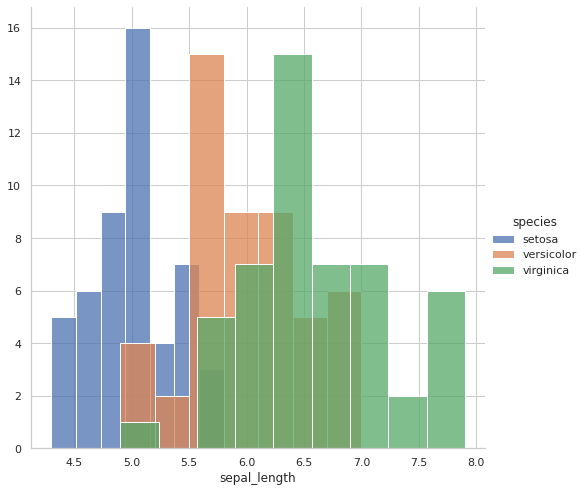

In [56]:
run = experiment.start_logging(snapshot_directory=None)
fig1=sb.FacetGrid(df, hue="species", height= 7) \
.map(sb.histplot, "sepal_length") \
.add_legend()
run.log_image("Distribution", plot=fig1)   
  
run.log("Comment", mycomment)

run.log("Azure ML version", AMLversion)

### Let's access to the Azure ML experiment to view the results

In [57]:
experiment

Experiment(Name: Lab0-Settings,
Workspace: AMLworkshop)

 You can view as well the results using the Azure ML Studio.

> You can open now the **Lab1 notebook**.

<img src="https://github.com/retkowsky/images/blob/master/Powered-by-MS-Azure-logo-v2.png?raw=true" height="300" width="300">